In [1]:
# predict which theme ...
import pandas as pd
import numpy as np

In [2]:
# read data -- sets
setsfile = '~/Documents/MSofDS/Spring2018/DS-Project2/lego-database/sets.csv'
sets = pd.read_csv(setsfile)
#sets.head()

In [3]:
themefile = '~/Documents/MSofDS/Spring2018/DS-Project2/lego-database/themes.csv'
themes = pd.read_csv(themefile)
#themes.head()

In [4]:
setsinvenfile = '~/Documents/MSofDS/Spring2018/DS-Project2/lego-database/inventory_sets.csv'
invenotry_sets = pd.read_csv(setsinvenfile)

In [5]:
invenfile = '~/Documents/MSofDS/Spring2018/DS-Project2/lego-database/inventories.csv'
invenotries = pd.read_csv(invenfile)
#invenotries.head()

In [6]:
invenpartsfile = '~/Documents/MSofDS/Spring2018/DS-Project2/lego-database/inventory_parts.csv'
invenotry_parts = pd.read_csv(invenpartsfile)

In [7]:
partsfile = '~/Documents/MSofDS/Spring2018/DS-Project2/lego-database/parts.csv'
parts = pd.read_csv(partsfile)
#parts.head()

In [8]:
#join sets and themes together
t1 = pd.merge(sets,themes, left_on = 'theme_id', right_on = 'id', suffixes = ('_set','_theme'))

In [9]:
# join t1 with ivnetories, inventoryset inventory parts
t4 = pd.merge(t1,invenotry_sets, on = 'set_num')
t4.head()

,set_num,name_set,year,theme_id,num_parts,id,name_theme,parent_id,inventory_id,quantity
0,6016-1,Knights' Arsenal,1987,199,37,199,Lion Knights,186.0,2216,1
1,6041-1,Armor Shop,1986,199,113,199,Lion Knights,186.0,2216,1
2,10000-1,Guarded Inn,2001,186,256,186,Castle,NaN,7474,1
3,10039-1,Black Falcon's Fortress,2002,186,431,186,Castle,NaN,7474,1
4,1794-1,Dragon Master Chariot,1994,186,36,186,Castle,NaN,5097,1


In [10]:
# then join parts and color and categories, and then join sets with them

#join t2 with color (t2 join inventory and inventory join color)
t3 = pd.merge(parts, invenotry_parts, on = 'part_num')
# drop useless columns
t3.head()

,part_num,name,part_cat_id,inventory_id,color_id,quantity,is_spare
0,0687b1,Set 0687 Activity Booklet 1,17,15235,9999,1,f
1,0901,Baseplate 16 x 30 with Set 080 Yellow House Print,1,1973,2,1,f
2,0902,Baseplate 16 x 24 with Set 080 Small White Hou...,1,1973,2,1,f
3,0903,Baseplate 16 x 24 with Set 080 Red House Print,1,1973,2,1,f
4,0904,Baseplate 16 x 24 with Set 080 Large White Hou...,1,1973,2,1,f


In [11]:
t5 = pd.merge(t4, t3, left_on = 'id', right_on = 'inventory_id', how = 'inner',suffixes = ('_inven','_parts'))
t5.head()

,set_num,name_set,year,theme_id,num_parts,id,name_theme,parent_id,inventory_id_inven,quantity_inven,part_num,name,part_cat_id,inventory_id_parts,color_id,quantity_parts,is_spare
0,6016-1,Knights' Arsenal,1987,199,37,199,Lion Knights,186.0,2216,1,10197,Technic Pin Connector Hub with 2 Perpendicular...,12,199,72,2,f
1,6016-1,Knights' Arsenal,1987,199,37,199,Lion Knights,186.0,2216,1,11334,Hero Factory Armour with Spikes,41,199,15,2,f
2,6016-1,Knights' Arsenal,1987,199,37,199,Lion Knights,186.0,2216,1,15365pat0001,Bionicle Zamor Sphere with Marbled White / Blu...,41,199,1,1,f
3,6016-1,Knights' Arsenal,1987,199,37,199,Lion Knights,186.0,2216,1,15366,Hero Factory Full Torso Armor with Connector f...,41,199,148,1,f
4,6016-1,Knights' Arsenal,1987,199,37,199,Lion Knights,186.0,2216,1,15376pat01,Large Figure Head Modified Chima Mammoth with ...,41,199,70,1,f


# how have the size of set changed over time?



In [12]:
## select part_num, nset_num, setname and year 
partdf = t5.filter(['part_num','set_num', 'year'], axis=1)
part1 = partdf.groupby(["year", "set_num"]).size().reset_index(name="num_of_parts")
print(part1.head())


   year set_num  num_of_parts
0  1970   603-3             6
1  1980  1062-1             1
2  1981  1064-1             1
3  1981   322-1             6
4  1981  6611-1           138


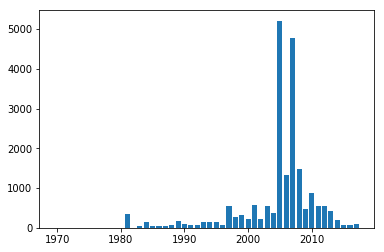

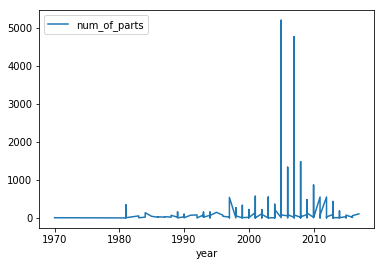

In [15]:
# count the size of parts based on year
part2 = part1.drop(part1.columns[[1]], axis=1)
part2.groupby('year')['num_of_parts'].sum()

# draw plot
import matplotlib.pyplot as plt
x = part2['year']
y = part2['num_of_parts']
plt.bar(x,y)

#set to index 
part3 = part2.set_index('year')
part3.plot()

In [1]:
# try to draw the graph that can zoom in and out

In [18]:
# examples
from bokeh.charts import Line, output_file, show

# prepare some data
data = {"y": [6, 7, 2, 4, 5], "z": [1, 5, 12, 4, 2]}

# output to static HTML file
output_file("lines.html", title="line plot example")

# create a new line chat with a title and axis labels
p = Line(data, title="simple line example", xlabel='x', ylabel='values', width=400, height=400)

# show the results
show(p)

ModuleNotFoundError: No module named 'bokeh.charts'

# Could you predict which theme a set is from just by the bricks it contains? 

In [14]:
# using size of parts in set to predict which theme is belongs
df_new = t5.filter(['name_part','name_theme'], axis=1)
df_q3 = df_new.groupby(["name_theme"]).size().reset_index(name="num_of_parts")

print(df_q3.head())

       name_theme  num_of_parts
0              9V           168
1  Advent Sub-Set          2640
2         Airport           423
3         Animals            33
4  Aquaraiders II            13


In [15]:
# divide training set, validation set and testing set
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_q3, test_size=0.4)  #60% training test and 40% testing 

In [16]:
# check how many rows in the training dataset
print(len(train.index))

89


In [17]:
# check how many rows in the testing dataset
print(len(test.index))

60


In [18]:
train.head()

,name_theme,num_of_parts
10,Basketball,148
98,Rock Raiders,119
102,Series 13 Minifigures,85
61,Indians,45
57,Hockey,58


In [19]:
list(train) 

['name_theme', 'num_of_parts']

In [20]:
# explanotary variables: both categorical and numeric
# response variable: categorical 


In [21]:
# unique theme
len(df_q3['name_theme'].unique())


149

In [22]:
train.isnull().sum() #no null value in train dataset

name_theme      0
num_of_parts    0
dtype: int64

In [23]:
# using naive bayes to predict
type(train)
train['name_theme'].unique()

array(['Basketball', 'Rock Raiders', 'Series 13 Minifigures', 'Indians',
       'Hockey', 'Power Racers', 'Gravity Games', 'Space Police II',
       'Knights Kingdom II', 'Fairy-Tale', 'Bionicle', 'Animals',
       'Imperial Soldiers', 'Prisoner of Azkaban', 'Cars', 'Competition',
       'Pirates III', 'Gas Station', 'World City', 'Bulk Bricks', 'Books',
       'Basic', '9V', 'Monster Fighters', 'Recreation',
       'The LEGO Movie Series', 'Divers', 'Series 15 Minifigures',
       'Mistika', 'Toa Metru', 'Black Knights', 'Basic Set',
       'Ultra Agents', 'Series 6 Minifigures', 'Barraki',
       'The Fellowship of the Ring', 'Turaga', 'Castle', 'RC Train',
       'Station', 'Belville', 'Ninja', 'Star Wars Episode 4/5/6', 'Race',
       'Power Functions', 'Designer Sets', 'Universal Building Set',
       'Glatorian', 'Airport', 'Advent Sub-Set', 'Classic Basic', 'Mini',
       'Matoran of Mahri Nui', 'Pirates', 'Atlantis', 'Pirates II',
       'Toa Hagah', 'Launch Command', 'Exo-Forc

In [24]:
#Import Library of Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
import numpy as np

In [25]:
model = GaussianNB()

In [26]:
x = train['num_of_parts'].values.reshape(1,-1) 
y = train['name_theme']

model.fit(x, y)

ValueError: Found input variables with inconsistent numbers of samples: [1, 89]

# What sets have the rarest pieces in them? 

In [159]:
# what is the rarest pieces in each sets?
# group by set, show part names
t5.head()


,set_num,name_set,year,theme_id,num_parts,id,name_theme,parent_id,inventory_id_inven,quantity_inven,part_num,name,part_cat_id,inventory_id_parts,color_id,quantity_parts,is_spare
0,6016-1,Knights' Arsenal,1987,199,37,199,Lion Knights,186.0,2216,1,10197,Technic Pin Connector Hub with 2 Perpendicular...,12,199,72,2,f
1,6016-1,Knights' Arsenal,1987,199,37,199,Lion Knights,186.0,2216,1,11334,Hero Factory Armour with Spikes,41,199,15,2,f
2,6016-1,Knights' Arsenal,1987,199,37,199,Lion Knights,186.0,2216,1,15365pat0001,Bionicle Zamor Sphere with Marbled White / Blu...,41,199,1,1,f
3,6016-1,Knights' Arsenal,1987,199,37,199,Lion Knights,186.0,2216,1,15366,Hero Factory Full Torso Armor with Connector f...,41,199,148,1,f
4,6016-1,Knights' Arsenal,1987,199,37,199,Lion Knights,186.0,2216,1,15376pat01,Large Figure Head Modified Chima Mammoth with ...,41,199,70,1,f


In [162]:
dflast = t5[['name_set','part_num','name']]

In [163]:
type(dflast)
#dflast = dflast.to_frame().reset_index()

pandas.core.frame.DataFrame

In [184]:
dflast.head()

,name_set,part_num,name
0,Knights' Arsenal,10197,Technic Pin Connector Hub with 2 Perpendicular...
1,Knights' Arsenal,11334,Hero Factory Armour with Spikes
2,Knights' Arsenal,15365pat0001,Bionicle Zamor Sphere with Marbled White / Blu...
3,Knights' Arsenal,15366,Hero Factory Full Torso Armor with Connector f...
4,Knights' Arsenal,15376pat01,Large Figure Head Modified Chima Mammoth with ...


In [207]:
# 在一个set中出现，在别的set中都没出现的part
# check if a value exist in dictionary once , return their key and value pair 
# draw their name and import picture of these parts 
rarest = dflast.name.unique()


In [208]:
len(rarest)

229

In [200]:
dflast['freq'] = dflast.groupby('name')['name'].transform('count')
dflast.sort_values('freq')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,name_set,part_num,name,freq
95903,Enchanted Island,3626cpr0937,"Minifig Head Black Eyebrows, Cheek Lines, Blac...",1
96101,Harbor Sentry,60639c02,"Arm Troll, Right with Pearl Dark Gray Wristband",1
655,Large Wheels and Axles,6538a,Technic Axle Connector Ridged [with + Hole + O...,1
96093,Harbor Sentry,59227pr03,Dragon Head Lower Jaw with White Teeth Print [...,1
96092,Harbor Sentry,59225c01,Serpent Neck S-Curve with Moveable Ball Joint Pin,1
658,Large Wheels and Axles,75c11,"Hose, Rigid 3mm D. 11L / 8.8cm",1
95895,Enchanted Island,30552,Hinge Cylinder 1 x 2 Locking with 1 Finger and...,1
96091,Harbor Sentry,59224pat0003,Dragon Torso (Fantasy Era) with Metallic Silve...,1
96090,Harbor Sentry,59218pat01,Dragon Arm with Black Claws - Right,1
96089,Harbor Sentry,59217pat01,Dragon Arm with Black Claws - Left,1


In [198]:
dflast.head()

,name_set,part_num,name,freq
0,Knights' Arsenal,10197,Technic Pin Connector Hub with 2 Perpendicular...,9
1,Knights' Arsenal,11334,Hero Factory Armour with Spikes,2
2,Knights' Arsenal,15365pat0001,Bionicle Zamor Sphere with Marbled White / Blu...,2
3,Knights' Arsenal,15366,Hero Factory Full Torso Armor with Connector f...,2
4,Knights' Arsenal,15376pat01,Large Figure Head Modified Chima Mammoth with ...,2


In [205]:
dflast = dflast[dflast['freq'] == 1]
len(dflast)
# there is 229 unique parts in all sets. same with rarest = dflast.name.unique() results.

229

In [212]:
dflast.head()

,name_set,part_num,name,freq
607,Large Wheels and Axles,2536,"Plant Tree Palm Trunk - Short Connector, no Ax...",1
609,Large Wheels and Axles,2711,"Technic Plate 1 x 5 with Toothed Ends, 2 Studs...",1
610,Large Wheels and Axles,2717,Technic Seat [3 x 2 Base],1
614,Large Wheels and Axles,2952,Propeller 2 Blade 9 Diameter,1
628,Large Wheels and Axles,3650c,Technic Gear 24 Tooth Crown with Reinforcement...,1


In [221]:
dflast.to_csv('q3.csv')